# Jupyter Notebook Version for calculating Equatorial Impact of the Niño

In [1]:
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation

## Configuration

In [2]:
# We will use sea surface temperature both for dataset and predictor, but
# with differnt regions
predictor = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-60, lonf=15,
           month0=Month.MAY, monthf=Month.JUL,
           year0=1976, yearf=2000),
    skip=1
)
predictand = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.DEC, monthf=Month.FEB,
           year0=1977, yearf=2001),
    skip=1
)
#  There is a lag of 5 months (from May to December)

## Methodology

### Preprocessing

In [3]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor)
predictor_preprocessed.save("y_", "./data-EquatorialAtalantic_Impact_Nino/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", "./data-EquatorialAtalantic_Impact_Nino/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-EquatorialAtalantic_Impact_Nino/")
# predictand_preprocessed = Preprocess.load("z_", "./data/-EquatorialAtalantic_Impact_Nino")

[INFO] Preprocessing data for variable sst took: 0.040 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/y_*.npy`
[INFO] Preprocessing data for variable sst took: 0.040 seconds
[INFO] Saving Preprocess data in `./data-EquatorialAtalantic_Impact_Nino/z_*.npy`


### MCA

In [4]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.05
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-EquatorialAtalantic_Impact_Nino/")
# mca = MCA.load("mca_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying MCA 
    Shapes: Z(1800, 25) 
            Y(1140, 25) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 200.00ºW, 60.00ºW) 
            Y MJJ (30.00ºS, 30.00ºN - 60.00ºW, 15.00ºE)
       Took: 1.084 seconds
[INFO] Saving MCA data in `./data-EquatorialAtalantic_Impact_Nino/mca_*.npy`


### Crossvalidation

In [5]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
cross.save("cross_", "./data-EquatorialAtalantic_Impact_Nino/")
# cross = Crossvalidation.load("cross_", "./data-EquatorialAtalantic_Impact_Nino/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying Crossvalidation 
    Shapes: Z(1800, 25) 
            Y(1140, 25) 
    Regions: Z DJF (30.00ºS, 30.00ºN - 200.00ºW, 60.00ºW) 
            Y MJJ (30.00ºS, 30.00ºN - 60.00ºW, 15.00ºE)
	year: 1 of 25
	year: 2 of 25
	year: 3 of 25
	year: 4 of 25
	year: 5 of 25
	year: 6 of 25
	year: 7 of 25
	year: 8 of 25
	year: 9 of 25
	year: 10 of 25
	year: 11 of 25
	year: 12 of 25
	year: 13 of 25
	year: 14 of 25
	year: 15 of 25
	year: 16 of 25
	year: 17 of 25
	year: 18 of 25
	year: 19 of 25
	year: 20 of 25
	year: 21 of 25
	year: 22 of 25
	year: 23 of 25
	year: 24 of 25
	year: 25 of 25

	Took: 41.194 seconds
[INFO] Saving Crossvalidation data in `./data-EquatorialAtalantic_Impact_Nino/cross_*.npy`


## Plotting results

[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/mca.png
[INFO] Saving plot with path ./plots-EquatorialAtalantic_Impact_Nino/cross.png


(<Figure size 1700x800 with 7 Axes>,
 (<GeoAxes: title={'center': 'Correlation in space between z and zhat'}>,
  <Axes: title={'center': 'Correlation in space between z and zhat'}>,
  <Axes: title={'center': 'Squared convariance fraction'}>,
  <Axes: title={'center': 'Us for mode 1'}>,
  <Axes: title={'center': 'Us for mode 2'}>,
  <Axes: title={'center': 'Us for mode 3'}>))

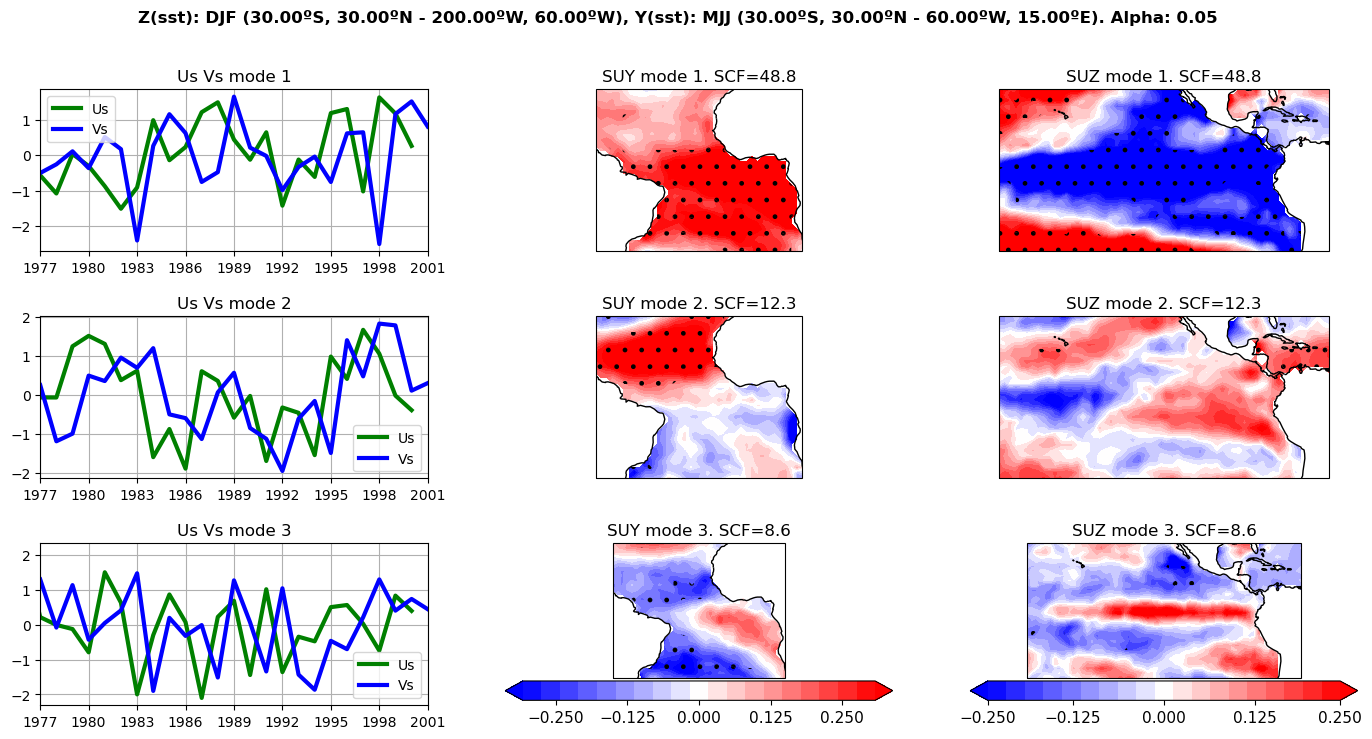

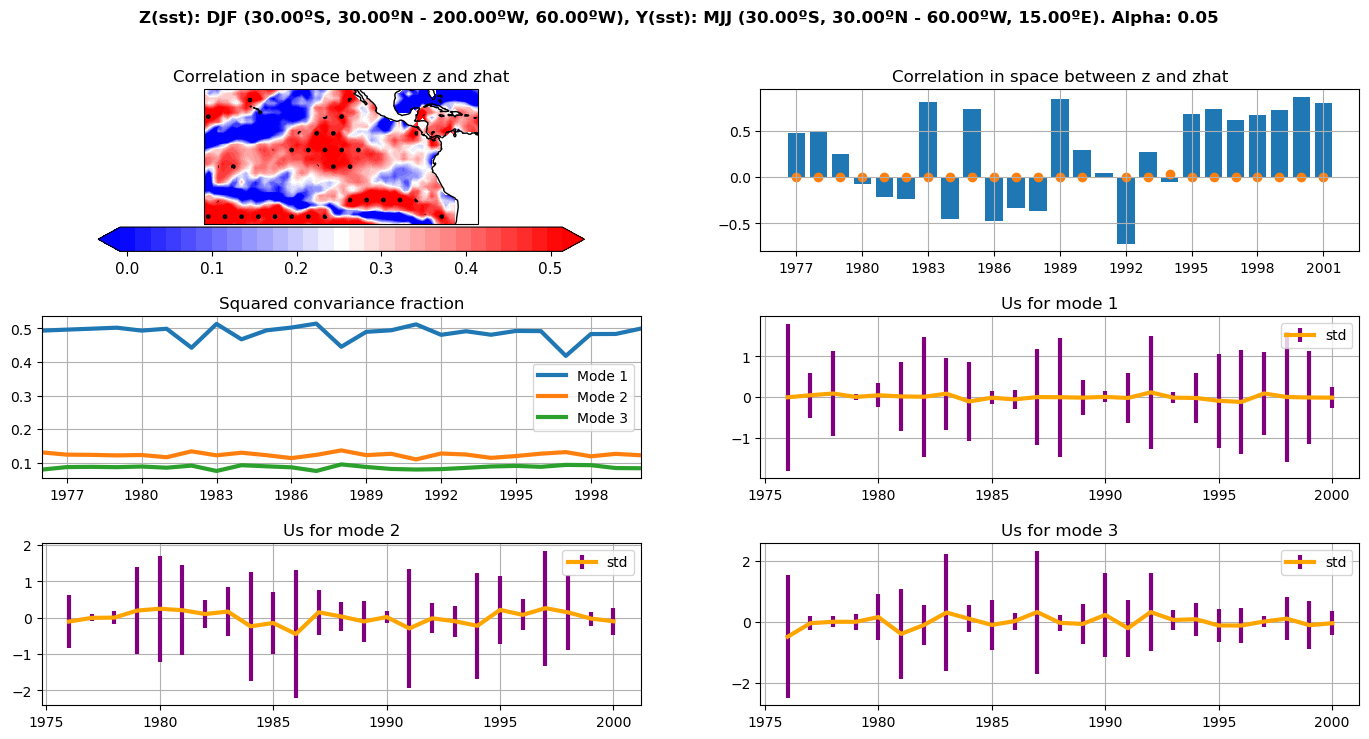

In [6]:
mca.plot(save_fig=True, name="mca.png", folder="./plots-EquatorialAtalantic_Impact_Nino/", suy_ticks=[-0.25, -0.125, 0, 0.125, 0.250], suz_ticks=[-0.25, -0.125, 0, 0.125, 0.250])
cross.plot(save_fig=True, name="cross.png", folder="./plots-EquatorialAtalantic_Impact_Nino/")
cross.plot_zhat(1998, figsize=(12, 10), save_fig=True, name="zhat_1998.png", folder="./plots-EquatorialAtalantic_Impact_Nino/")